# **Cassava VisionTransformer fine-tuning**
2021/01/25 written by T.Yonezu

In [1]:
%load_ext autoreload
%autoreload 2

import torch
from torch.utils.data import DataLoader, Dataset
import timm

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import glob 
import os
from tqdm import tqdm

from cassava_dataset import *
from augmentation import *

import warnings
warnings.simplefilter('ignore')

In [2]:
input_dir = os.path.join('..',"..", 'input', 'cassava-leaf-disease-classification')

## **Fine-tuning**

In [3]:
x = pd.read_csv(os.path.join(input_dir, 'train.csv'))
x["image_path"] = os.path.join(input_dir,"train_images")
x["image_path"] = x["image_path"].str.cat(x["image_id"], sep=os.path.sep)


from sklearn.model_selection import train_test_split

train_df , valid_df = train_test_split(x,test_size=0.33, random_state=42)
train_df = EqualizeLabels(train_df,NUM=15000)

train_dict = dict( zip(train_df["image_path"],train_df["label"]) )
valid_dict = dict( zip(valid_df["image_path"],valid_df["label"]) )

In [4]:
BATCH_SIZE = 32
size = (224,224)
mean = [0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

transform = ImageTransform(size,mean,std)
train_data = CassavaDataset(train_dict,transform=transform,phase="train")
train_data = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)

valid_data = CassavaDataset(valid_dict,transform=transform,phase="val")
valid_data = DataLoader(valid_data,batch_size=BATCH_SIZE)

In [5]:
EPOCH_NUM = 40

OUT_DIR = os.path.join("..","..","input","cassava-models")
MODEL_NAME = "vit_base_resnet50d_224_cassava(224x224)_EL_finetuned_%dEpoch.mdl"
PATH = os.path.join(OUT_DIR,MODEL_NAME%EPOCH_NUM)

In [6]:
print("AVAILABLE VisionTransformer Models:")
timm.list_models("vit*")

AVAILABLE VisionTransformer Models:


['vit_base_patch16_224',
 'vit_base_patch16_384',
 'vit_base_patch32_384',
 'vit_base_resnet26d_224',
 'vit_base_resnet50d_224',
 'vit_huge_patch16_224',
 'vit_huge_patch32_384',
 'vit_large_patch16_224',
 'vit_large_patch16_384',
 'vit_large_patch32_384',
 'vit_small_patch16_224',
 'vit_small_resnet26d_224',
 'vit_small_resnet50d_s3_224']

In [7]:
import timm

model = timm.create_model('vit_base_resnet50d_224',pretrained=True)
in_features = model.head.in_features
model.head = nn.Linear(in_features=in_features, out_features=5, bias=True)

#model

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth" to C:\Users\organ/.cache\torch\hub\checkpoints\resnet50d_ra2-464e36ba.pth


  0%|                                                                | 0/40 [00:00<?, ?it/s]

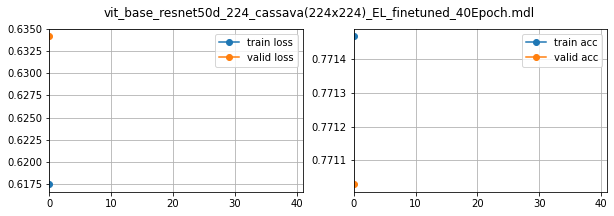

  2%|█▎                                                   | 1/40 [03:53<2:32:00, 233.87s/it]

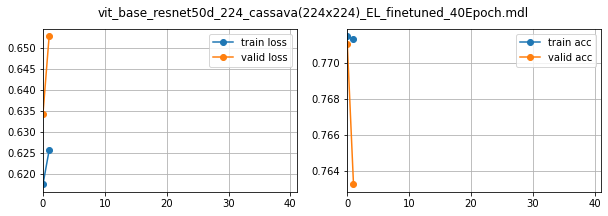

  5%|██▋                                                  | 2/40 [07:48<2:28:16, 234.11s/it]

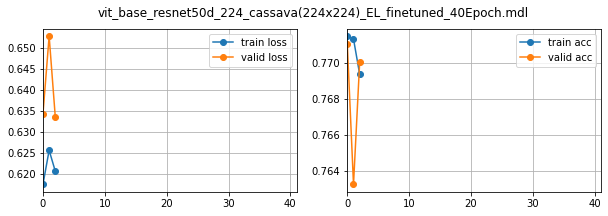

  8%|███▉                                                 | 3/40 [11:42<2:24:19, 234.03s/it]

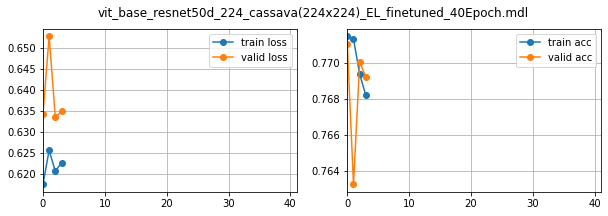

 10%|█████▎                                               | 4/40 [15:35<2:20:18, 233.84s/it]

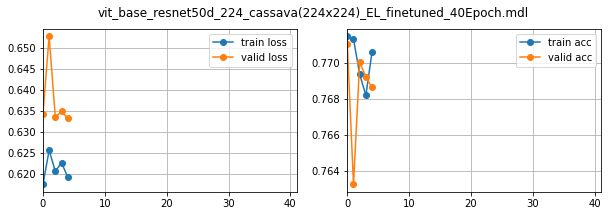

 12%|██████▋                                              | 5/40 [19:29<2:16:20, 233.72s/it]

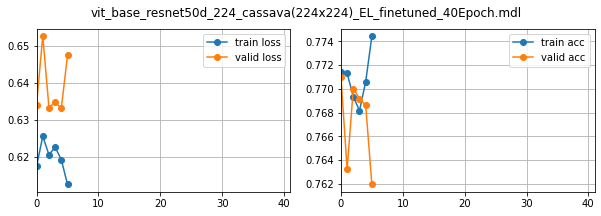

 15%|███████▉                                             | 6/40 [23:22<2:12:24, 233.66s/it]

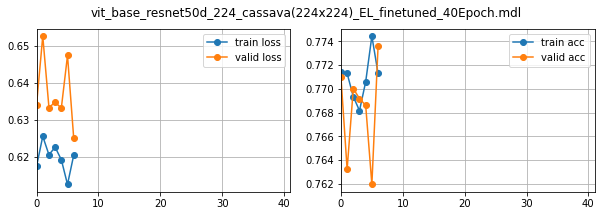

 18%|█████████▎                                           | 7/40 [27:17<2:08:37, 233.86s/it]

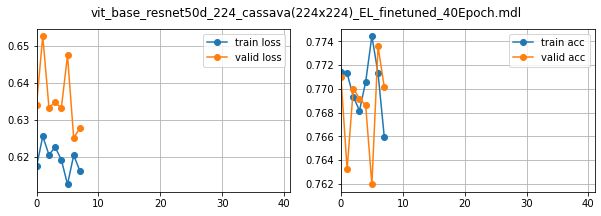

 20%|██████████▌                                          | 8/40 [31:11<2:04:45, 233.92s/it]

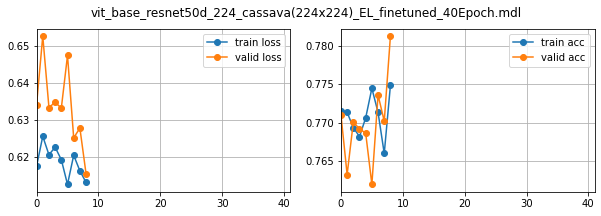

 22%|███████████▉                                         | 9/40 [35:05<2:00:54, 234.01s/it]

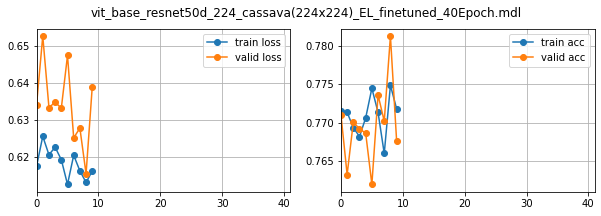

 25%|█████████████                                       | 10/40 [38:59<1:56:58, 233.96s/it]

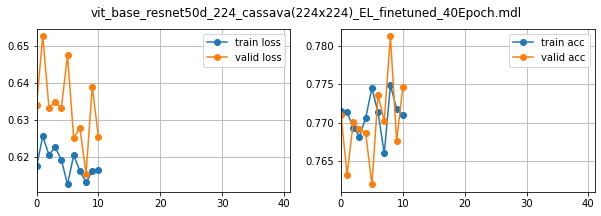

 28%|██████████████▎                                     | 11/40 [42:52<1:53:02, 233.88s/it]

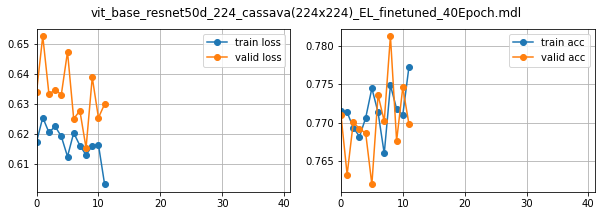

 30%|███████████████▌                                    | 12/40 [46:46<1:49:06, 233.81s/it]

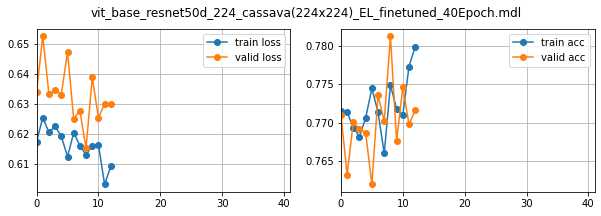

 32%|████████████████▉                                   | 13/40 [50:40<1:45:11, 233.76s/it]

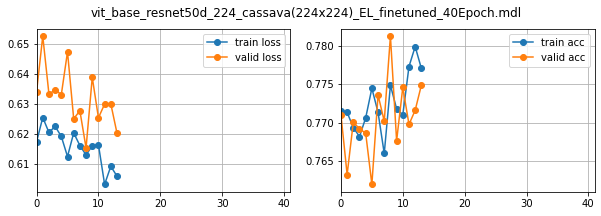

 35%|██████████████████▏                                 | 14/40 [54:33<1:41:14, 233.65s/it]

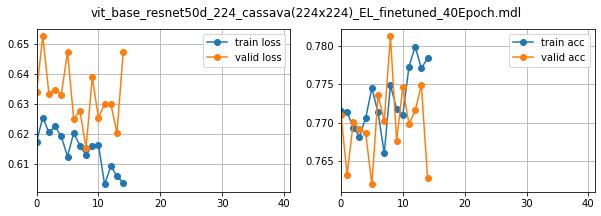

 38%|███████████████████▌                                | 15/40 [58:26<1:37:18, 233.55s/it]

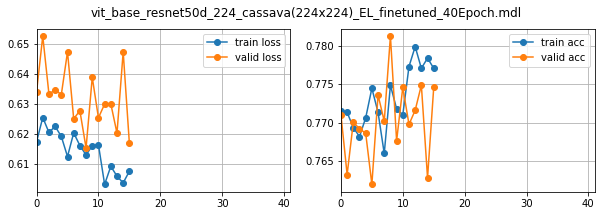

 40%|████████████████████                              | 16/40 [1:02:20<1:33:23, 233.49s/it]

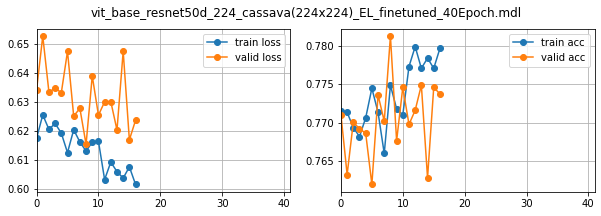

 42%|█████████████████████▎                            | 17/40 [1:06:13<1:29:28, 233.43s/it]

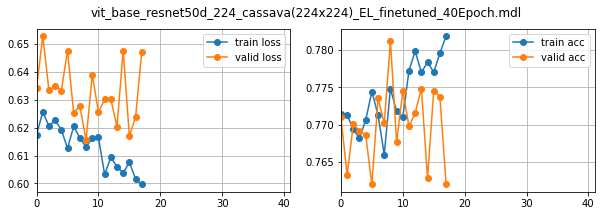

 45%|██████████████████████▌                           | 18/40 [1:10:06<1:25:34, 233.40s/it]

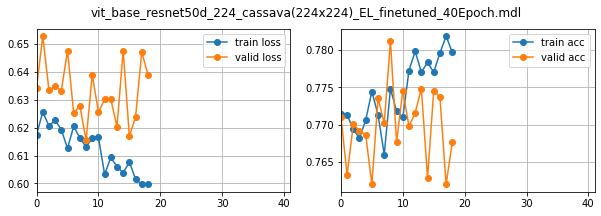

 48%|███████████████████████▊                          | 19/40 [1:14:00<1:21:40, 233.34s/it]

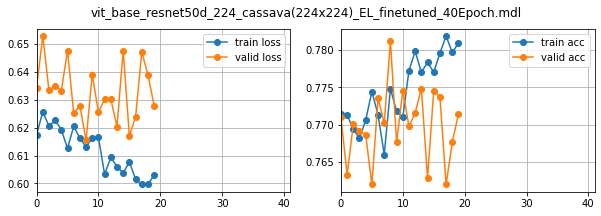

 50%|█████████████████████████                         | 20/40 [1:17:53<1:17:47, 233.37s/it]

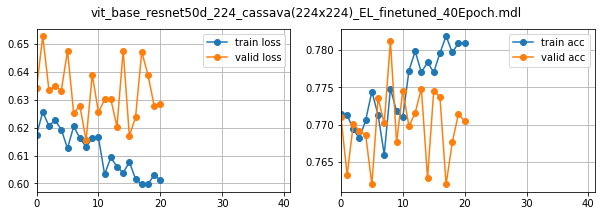

 52%|██████████████████████████▎                       | 21/40 [1:21:46<1:13:54, 233.37s/it]

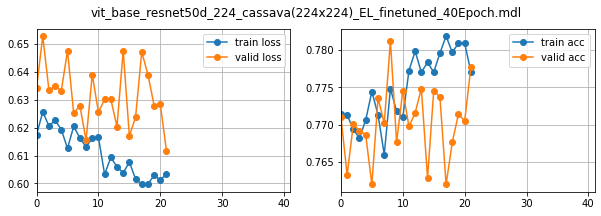

 55%|███████████████████████████▌                      | 22/40 [1:25:40<1:10:02, 233.44s/it]

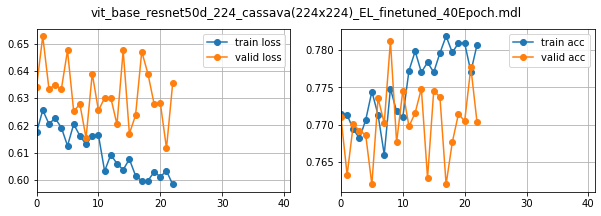

 57%|████████████████████████████▋                     | 23/40 [1:29:34<1:06:09, 233.52s/it]

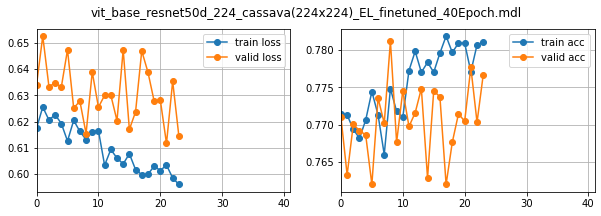

 60%|██████████████████████████████                    | 24/40 [1:33:27<1:02:16, 233.56s/it]

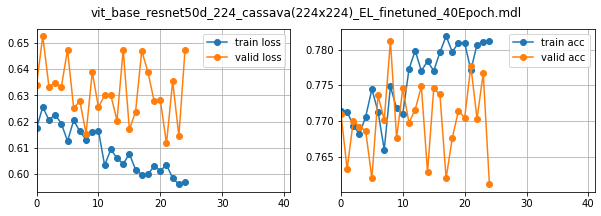

 62%|████████████████████████████████▌                   | 25/40 [1:37:21<58:23, 233.59s/it]

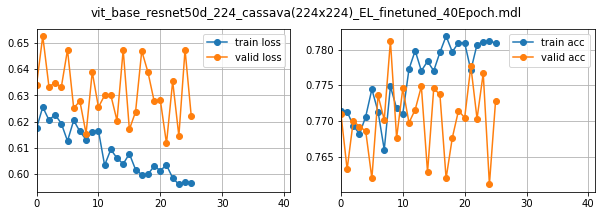

 65%|█████████████████████████████████▊                  | 26/40 [1:41:14<54:29, 233.51s/it]

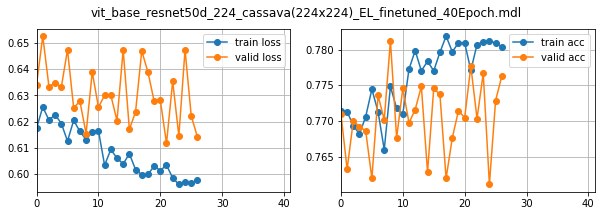

 68%|███████████████████████████████████                 | 27/40 [1:45:08<50:34, 233.46s/it]

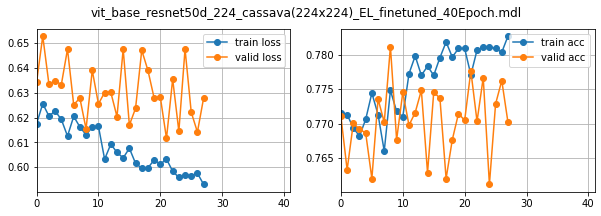

 70%|████████████████████████████████████▍               | 28/40 [1:49:01<46:41, 233.43s/it]

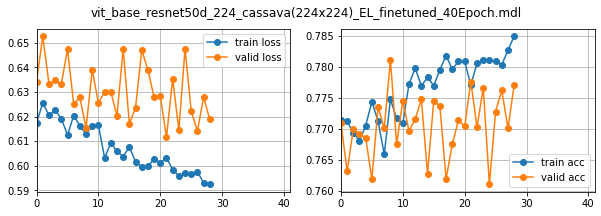

 72%|█████████████████████████████████████▋              | 29/40 [1:52:54<42:47, 233.39s/it]

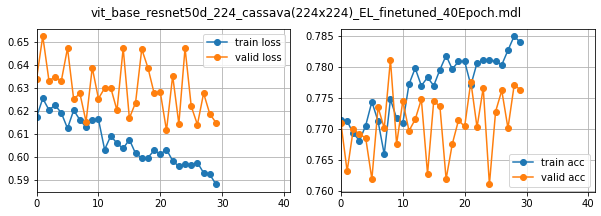

 75%|███████████████████████████████████████             | 30/40 [1:56:49<38:56, 233.69s/it]

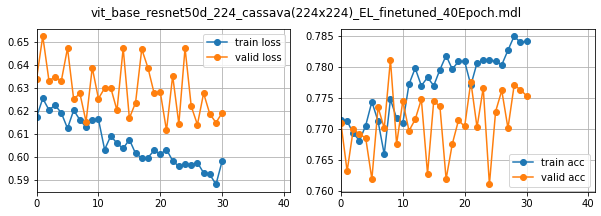

 78%|████████████████████████████████████████▎           | 31/40 [2:00:42<35:02, 233.60s/it]

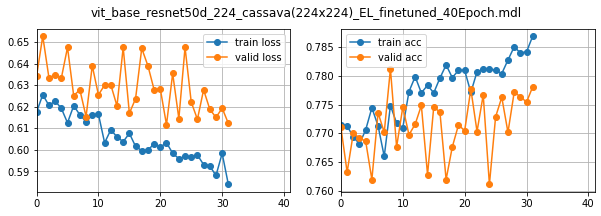

 80%|█████████████████████████████████████████▌          | 32/40 [2:04:36<31:10, 233.81s/it]

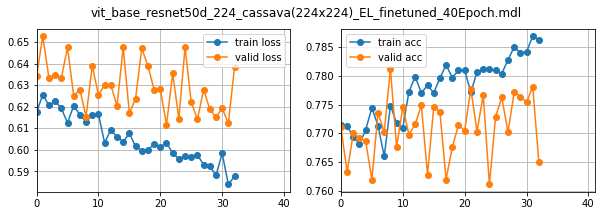

 82%|██████████████████████████████████████████▉         | 33/40 [2:08:30<27:16, 233.85s/it]

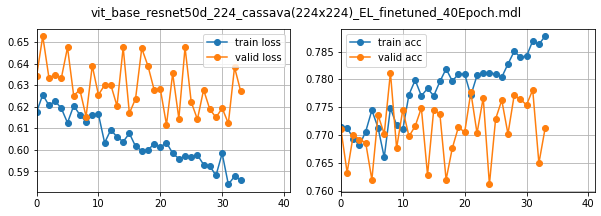

 85%|████████████████████████████████████████████▏       | 34/40 [2:12:24<23:23, 233.85s/it]

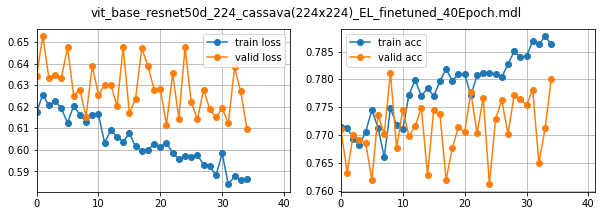

 88%|█████████████████████████████████████████████▌      | 35/40 [2:16:18<19:29, 233.81s/it]

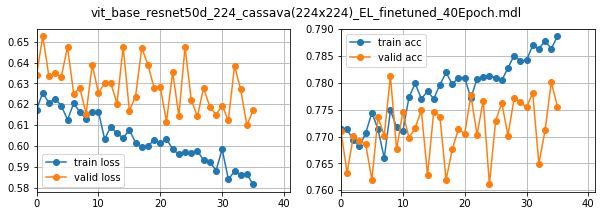

 90%|██████████████████████████████████████████████▊     | 36/40 [2:20:11<15:34, 233.70s/it]

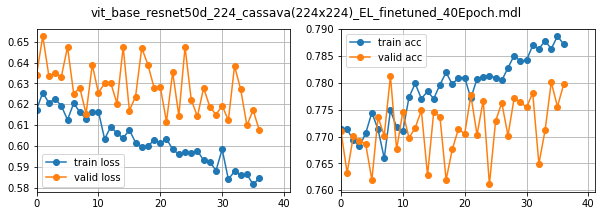

 92%|████████████████████████████████████████████████    | 37/40 [2:24:05<11:40, 233.63s/it]

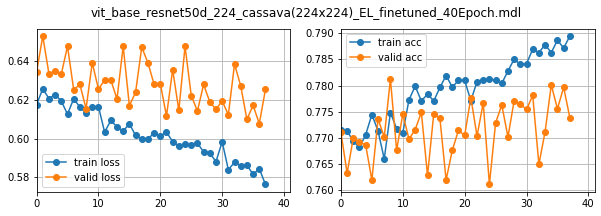

 95%|█████████████████████████████████████████████████▍  | 38/40 [2:27:58<07:47, 233.58s/it]

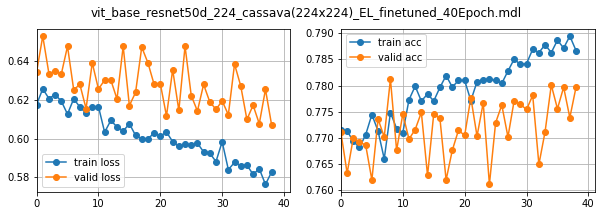

 98%|██████████████████████████████████████████████████▋ | 39/40 [2:31:52<03:53, 233.58s/it]

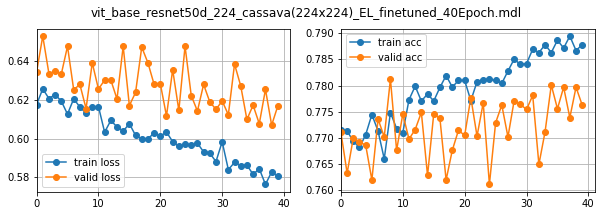

100%|████████████████████████████████████████████████████| 40/40 [2:35:45<00:00, 233.64s/it]


In [11]:
import torch.optim as optim
from torch import nn

model = model.cuda()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

log = {}

best_acc = -np.inf

scaler = torch.cuda.amp.GradScaler()
torch.backends.cudnn.benchmark = True
for epoch in tqdm(range(EPOCH_NUM)):
    
    model.train()
    train_acc = 0
    train_loss = 0
    for batch in (train_data):
        X = batch[0].cuda()
        y = batch[1].cuda()
        
        # zero the gradient buffers
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            pred = model(X)
            loss = criterion(pred, y)
        
            scaler.scale(loss).backward()
            scaler.step(optimizer) # Does the update
            scaler.update()
        
        pred_label = ( pred.argmax(axis=1) ).cpu().numpy()
        y = y.cpu().numpy()
        train_acc += (pred_label == y).sum()
        train_loss += loss.item() * X.size(0)
        
    train_acc = train_acc/len(train_data.dataset)
    train_loss = train_loss/len(train_data.dataset)
    
    
    model.eval()
    valid_acc = 0
    valid_loss = 0
    for batch in (valid_data): 
        X = batch[0].cuda()
        y = batch[1].cuda()
        
        with torch.cuda.amp.autocast():
            pred = model(X)
            loss = criterion(pred, y)
        
        pred_label = ( pred.argmax(axis=1) ).cpu().numpy()
        y = y.cpu().numpy()
        
        valid_acc += (pred_label == y).sum()
        valid_loss += loss.item() * X.size(0)
    
    valid_acc = valid_acc/len(valid_data.dataset)
    valid_loss = valid_loss/len(valid_data.dataset)
    
    
    if valid_acc > best_acc:
        torch.save(model.state_dict(),PATH)
        best_acc = valid_acc
    
    
    log[epoch] = [train_acc, train_loss, valid_acc, valid_loss]
    
    if epoch%1 == 0:
        log_df = pd.DataFrame.from_dict(log,
                                        orient="index",
                                        columns=["train acc","train loss","valid acc","valid loss"])
        
        fig = plt.figure(figsize=(10,3))
        
        ax = fig.add_subplot(1,2,1)
        log_df[["train loss","valid loss"]].plot(marker="o",ax=ax)
        ax.set_xlim(0,EPOCH_NUM+1)
        ax.grid(True)
        
        ax2 = fig.add_subplot(1,2,2)
        log_df[["train acc","valid acc"]].plot(marker="o",ax=ax2)
        ax2.grid(True)
        ax2.set_xlim(0,EPOCH_NUM+1)
        
        fig.suptitle(MODEL_NAME%EPOCH_NUM)
        plt.savefig(MODEL_NAME+".png",format="png")
        plt.show()